### Lection 4 week 7

In [1]:
!pip install pandas_profiling

In [2]:
import math
import random
import numpy as np

# import pandas for structuring the data
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import glob
import os

# Other utilities
from sklearn import datasets, preprocessing, metrics

In [3]:
import pandas_profiling

In [4]:
pwd

'C:\\Users\\Nmtur\\PycharmProjects\\Cphbusiness 2_semester\\Data sience\\Doras github'

In [5]:
red_wine = pd.read_excel('winequality-red.xlsx', skiprows=1)
white_wine = pd.read_excel('winequality-white.xlsx', skiprows=1)

## Joining datasets

In [6]:
red_wine['type'] = 'red'

In [7]:
white_wine['type'] = 'white'

In [8]:
wine_set = [red_wine, white_wine]

In [9]:
all_wines = pd.concat(wine_set)

In [10]:
all_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
all_wines.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [12]:
all_wines.reset_index(drop=True, inplace=True)

In [13]:
all_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [14]:
all_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


## Explore the general parameters of the new file:
• number of rows and columns

• type of data in each column

• descriptive statstics of the numeric data (count, mean, min, max, std, quantiles)

In [22]:
# See rows and columns

all_wines.shape

(6497, 13)

### 2 Ways of showing columns

In [23]:
all_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [15]:
list(all_wines)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'type']

### The type of data in each columns

In [17]:
# Type of data in each row
all_wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

### Descriptive data of the wines

In [18]:
all_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Count of the data in the wine file

In [24]:
all_wines.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
type                    6497
dtype: int64

### Mean of the columns

In [26]:
all_wines.mean()

C:\Users\Nmtur\AppData\Local\Temp/ipykernel_14828/454274112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_wines.mean()


fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

### min value of the columns

In [27]:
all_wines.min()

fixed acidity               3.8
volatile acidity           0.08
citric acid                 0.0
residual sugar              0.6
chlorides                 0.009
free sulfur dioxide         1.0
total sulfur dioxide        6.0
density                 0.98711
pH                         2.72
sulphates                  0.22
alcohol                     8.0
quality                       3
type                        red
dtype: object

### max value of the columns

In [28]:
all_wines.max()

fixed acidity              15.9
volatile acidity           1.58
citric acid                1.66
residual sugar             65.8
chlorides                 0.611
free sulfur dioxide       289.0
total sulfur dioxide      440.0
density                 1.03898
pH                         4.01
sulphates                   2.0
alcohol                    14.9
quality                       9
type                      white
dtype: object

### standard deviation (std) of the wine

In [29]:
all_wines.std()

C:\Users\Nmtur\AppData\Local\Temp/ipykernel_14828/852816979.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_wines.std()


fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
quality                  0.873255
dtype: float64

### Quantile of the dataset - How much of the full date is filled by what

In [31]:
all_wines.quantile()

fixed acidity             7.00000
volatile acidity          0.29000
citric acid               0.31000
residual sugar            3.00000
chlorides                 0.04700
free sulfur dioxide      29.00000
total sulfur dioxide    118.00000
density                   0.99489
pH                        3.21000
sulphates                 0.51000
alcohol                  10.30000
quality                   6.00000
Name: 0.5, dtype: float64

### Plot Diagrams

<AxesSubplot:>

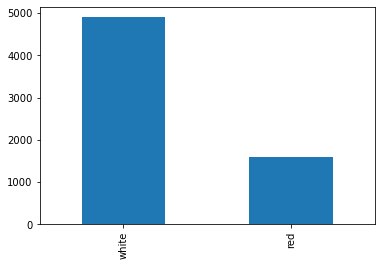

In [35]:
 all_wines['type'].value_counts().plot(kind='bar')

As shown above, there are a lot more red wine in the data set than white wine

In [ ]:
all_wines.plot(kind='bar', x='type', y='quality', figsize=(20,20))

<AxesSubplot:xlabel='type'>